In [5]:
from tweepy import OAuthHandler
import datetime
import json, time, sys
import csv
import tweepy
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
# Authenticate to Twitter

CONSUMER_KEY = "xjWvD2yPEDE4IajFZLD3Q7oGS"
CONSUMER_SECRET = "A8YoF9hBHHeJeyyyqP8AQlXviqo3PGPnhBBdXb6tafhvR4377p"
ACCESS_TOKEN = "942908072-njP8j7oMB9A6gjbPocXEdaKzKyUUZSZ769BQpQl5"
ACCESS_TOKEN_SECRET = "YnZm58q2WfvFFliKBlN1hMA2ZFlg3OphVldOGvgiWicvz"

auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET) 
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [10]:
posts = api.user_timeline(screen_name="CNNIndonesia", count = 300, lang ="id", tweet_mode="extended")

In [11]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [12]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [13]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [16]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1600, height=800, random_state=30, max_font_size=200, min_font_size=20).generate(allWords)

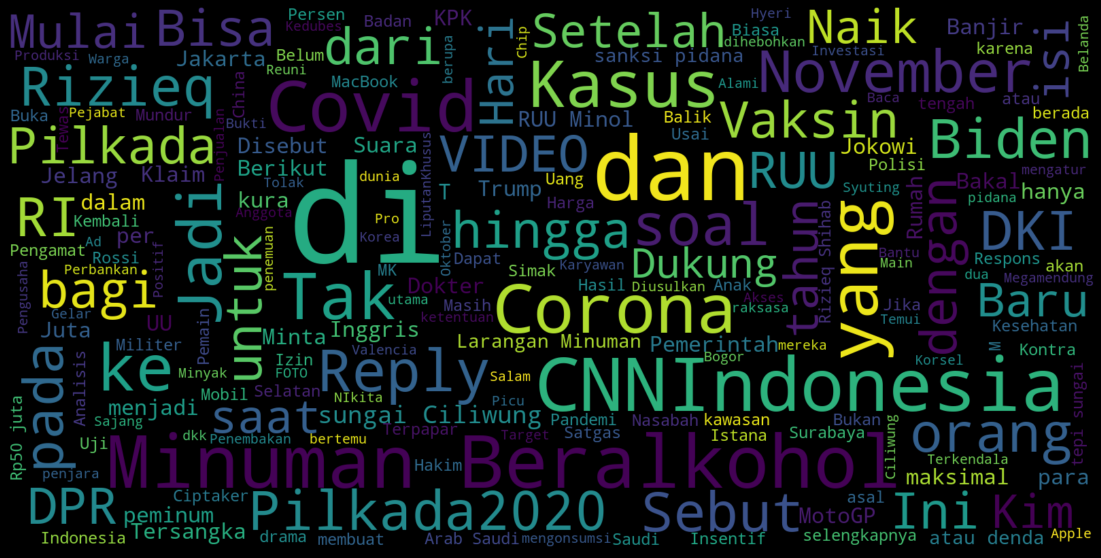

In [17]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()